In [87]:
import numpy as np
import pandas as pd

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Content

Attribute Information:
 1. age
 2. sex
 3. chest pain type (4 values)
 4. resting blood pressure
 5. serum cholestoral in mg/dl
 6. fasting blood sugar > 120 mg/dl
 7. resting electrocardiographic results (values 0,1,2)
 8. maximum heart rate achieved
 9. exercise induced angina
 10. oldpeak = ST depression induced by exercise relative to rest
 11. the slope of the peak exercise ST segment
 12. number of major vessels (0-3) colored by flourosopy
 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [88]:
df=pd.read_csv('Disease.csv')

In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

cp: chest pain type
-- Value 0: asymptomatic
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: typical angina
 
restecg: resting electrocardiographic results
-- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
-- Value 1: normal
-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 
slope: the slope of the peak exercise ST segment
0: downsloping; 1: flat; 2: upsloping
 
thal
Results of the blood flow observed via the radioactive dye.
 
Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
This feature and the next one are obtained through a very invasive process for the patients. But, by themselves, they give a very good indication of the presence of a heart disease or not.
 
target : 0 = disease, 1 = no disease

# Data Visualization

In [91]:
df2=df.copy()

In [92]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette('Paired')

In [94]:
def change_sex(sex):
    if sex==0:
        return 'Female'
    else:
        return 'Male'
def change_target(target):
    if target == 0:
        return 'Heart_Disease'
    else:
        return 'No_Heart_Disease'
def change_cp(cp):
    if cp==0:
        return 'Asymptomatic'
    elif cp==1:
        return 'Atypical_Angina'
    elif cp==2:
        return 'Non-Anginal_Pain'
    else:
        return 'Typical_angina'

def change_restecg(restecg):
    if restecg==0:
        return 'Normal'
    elif restecg==1:
        return 'ST-T_Wave_Abnormality'
    else:
        return 'Left_Ventricular_Hyperthrophy'
def change_thal(thal):
    if thal==1:
        return 'Fixed_Defect'
    elif thal==1:
        return 'Normal'
    else:
        return 'Reversible_Defect'
def change_slope(slope):
    if slope==0:
        return 'Down_Sloping'
    elif slope==1:
        return 'Flat'
    else:
        return 'Up_Sloping'

def change_fbs(fbs):
    if fbs==0:
        return 'FBS_Lesser'
    else:
        return 'FBS_Greater'
def change_ca(ca):
    if ca==0:
        return 'Major_Vessels_0'
    elif ca==1:
        return 'Major_Vessels_1'
    elif ca==2:
        return 'Major_Vessels_2'
    elif ca==3:
        return 'Major_Vessels_3'
    else:
        return 'Major_Vessels_4'
    

In [95]:
df2['sex'] = df2['sex'].apply(change_sex)
df2['target'] = df2['target'].apply(change_target)
df2['cp'] = df2['cp'].apply(change_cp)
df2['restecg'] = df2['restecg'].apply(change_restecg)
df2['thal'] = df2['thal'].apply(change_thal)
df2['slope'] = df2['slope'].apply(change_slope)
df2['fbs'] = df2['fbs'].apply(change_fbs)
df2['ca'] = df2['ca'].apply(change_ca)

In [96]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Typical_angina,145,233,FBS_Greater,Normal,150,0,2.3,Down_Sloping,Major_Vessels_0,Fixed_Defect,No_Heart_Disease
1,37,Male,Non-Anginal_Pain,130,250,FBS_Lesser,ST-T_Wave_Abnormality,187,0,3.5,Down_Sloping,Major_Vessels_0,Reversible_Defect,No_Heart_Disease
2,41,Female,Atypical_Angina,130,204,FBS_Lesser,Normal,172,0,1.4,Up_Sloping,Major_Vessels_0,Reversible_Defect,No_Heart_Disease
3,56,Male,Atypical_Angina,120,236,FBS_Lesser,ST-T_Wave_Abnormality,178,0,0.8,Up_Sloping,Major_Vessels_0,Reversible_Defect,No_Heart_Disease
4,57,Female,Asymptomatic,120,354,FBS_Lesser,ST-T_Wave_Abnormality,163,1,0.6,Up_Sloping,Major_Vessels_0,Reversible_Defect,No_Heart_Disease


Target

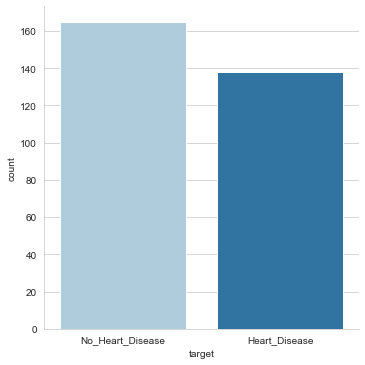

In [97]:
g=sns.catplot(x='target',data=df2,kind='count')

Age

<AxesSubplot:xlabel='age', ylabel='Count'>

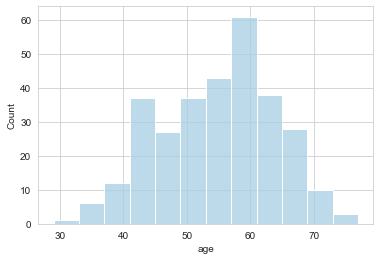

In [98]:
sns.histplot(x='age',data=df2)

 Trestbps

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

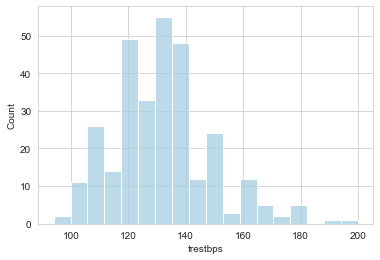

In [99]:
sns.histplot(x='trestbps',data=df2)

Thalach

<AxesSubplot:xlabel='thalach', ylabel='Count'>

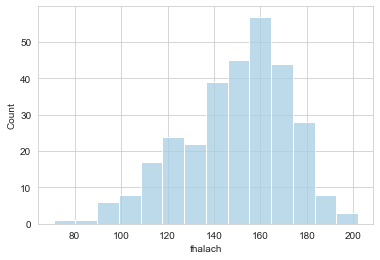

In [100]:
sns.histplot(x='thalach',data=df2)

Chol

<AxesSubplot:xlabel='chol', ylabel='Count'>

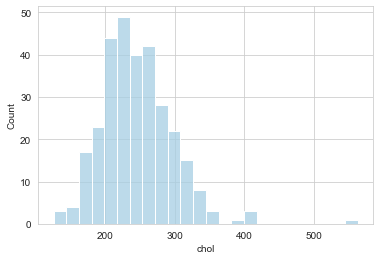

In [101]:
sns.histplot(x='chol',data=df2)

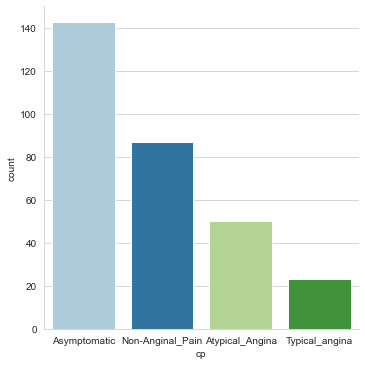

In [102]:
g=sns.catplot(x='cp',data=df2,kind='count',order=df2['cp'].value_counts().index)

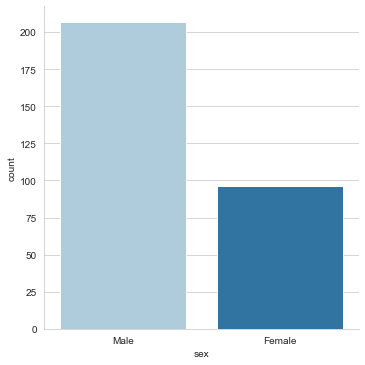

In [103]:
g=sns.catplot(x='sex',data=df2,kind='count')

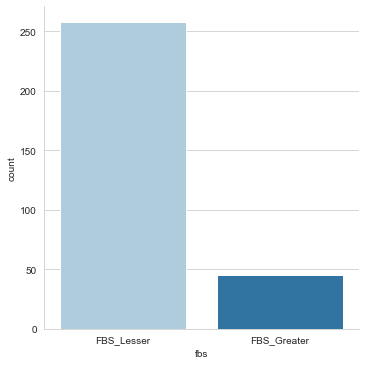

In [104]:
g=sns.catplot(x='fbs',data=df2,kind='count',order=df2['fbs'].value_counts().index)

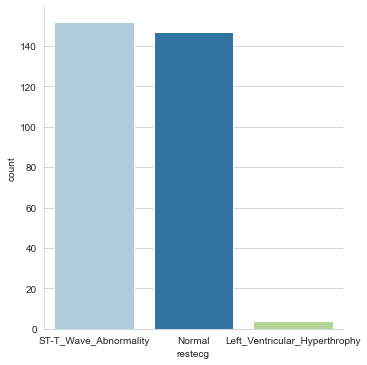

In [105]:
g=sns.catplot(x='restecg',data=df2,kind='count',order=df2['restecg'].value_counts().index)

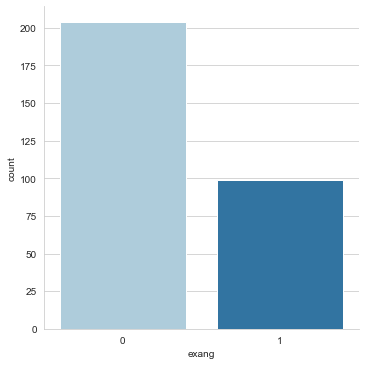

In [106]:
g=sns.catplot(x='exang',data=df2,kind='count',order=df2['exang'].value_counts().index)

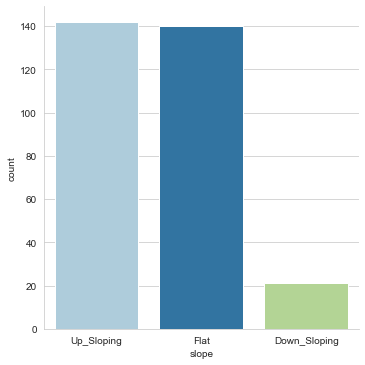

In [107]:
g=sns.catplot(x='slope',data=df2,kind='count',order=df2['slope'].value_counts().index)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Major_Vessels_0'),
  Text(1, 0, 'Major_Vessels_1'),
  Text(2, 0, 'Major_Vessels_2'),
  Text(3, 0, 'Major_Vessels_3'),
  Text(4, 0, 'Major_Vessels_4')])

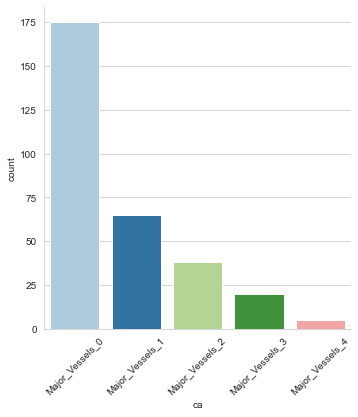

In [108]:
g=sns.catplot(x='ca',data=df2,kind='count',order=df2['ca'].value_counts().index)
plt.xticks(rotation=45)

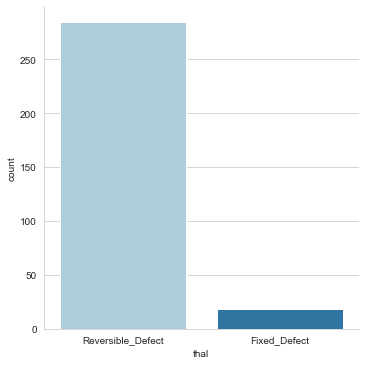

In [109]:
g=sns.catplot(x='thal',data=df2,kind='count',order=df2['thal'].value_counts().index)

Bivariate Analysis

<AxesSubplot:xlabel='target', ylabel='age'>

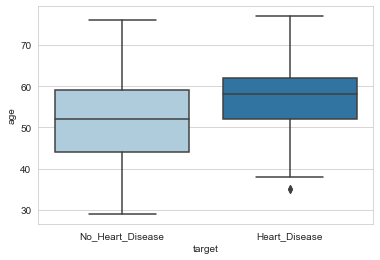

In [110]:
sns.boxplot(x='target',y='age',data=df2)

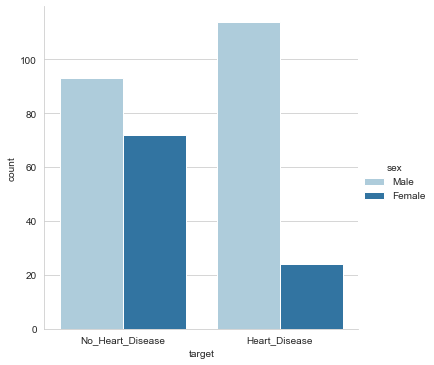

In [111]:
sns.catplot(x='target',data=df2,kind='count',hue='sex')

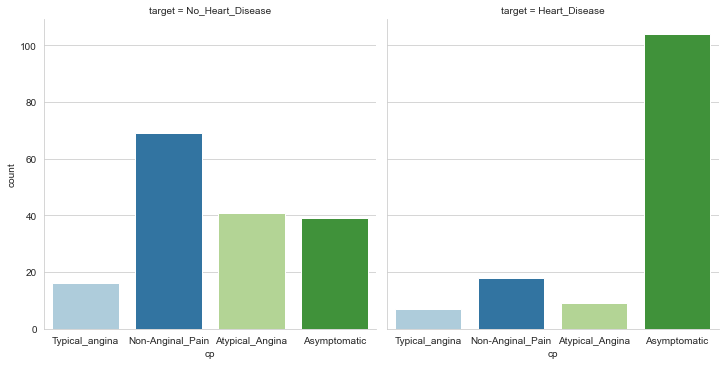

In [112]:
sns.catplot(x='cp',data=df2,kind='count',col='target')

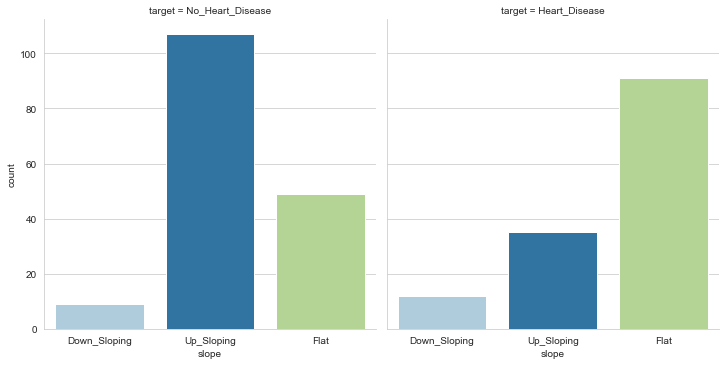

In [113]:
sns.catplot(x='slope',data=df2,kind='count',col='target')

<AxesSubplot:xlabel='target', ylabel='trestbps'>

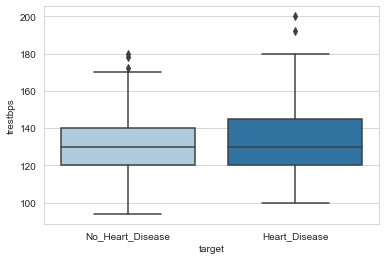

In [114]:
sns.boxplot(x='target',y='trestbps',data=df2)

<AxesSubplot:xlabel='target', ylabel='thalach'>

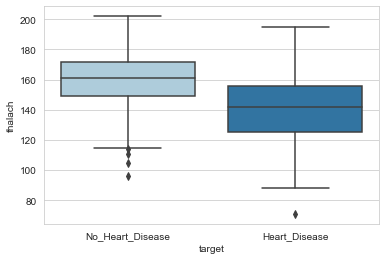

In [115]:
sns.boxplot(x='target',y='thalach',data=df2)

# Model Building

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [117]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Scaling & Train Test Split

In [118]:
data = pd.get_dummies(df2, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [119]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_Female,sex_Male,cp_Asymptomatic,cp_Atypical_Angina,...,slope_Down_Sloping,slope_Flat,slope_Up_Sloping,ca_Major_Vessels_0,ca_Major_Vessels_1,ca_Major_Vessels_2,ca_Major_Vessels_3,ca_Major_Vessels_4,thal_Fixed_Defect,thal_Reversible_Defect
0,63,145,233,150,2.3,No_Heart_Disease,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,No_Heart_Disease,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,41,130,204,172,1.4,No_Heart_Disease,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,56,120,236,178,0.8,No_Heart_Disease,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
4,57,120,354,163,0.6,No_Heart_Disease,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1


In [120]:
def actual_target(target):
    if target=="No_Heart_Disease":
        return 1
    else:
        return 0

In [121]:
data['target']=data['target'].apply(actual_target)

In [122]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_Female,sex_Male,cp_Asymptomatic,cp_Atypical_Angina,...,slope_Down_Sloping,slope_Flat,slope_Up_Sloping,ca_Major_Vessels_0,ca_Major_Vessels_1,ca_Major_Vessels_2,ca_Major_Vessels_3,ca_Major_Vessels_4,thal_Fixed_Defect,thal_Reversible_Defect
0,63,145,233,150,2.3,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,41,130,204,172,1.4,1,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,56,120,236,178,0.8,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
4,57,120,354,163,0.6,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1


In [123]:
data=(data-np.min(data))/(np.max(data)-np.min(data)).values

In [124]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_Female,sex_Male,cp_Asymptomatic,cp_Atypical_Angina,...,slope_Down_Sloping,slope_Flat,slope_Up_Sloping,ca_Major_Vessels_0,ca_Major_Vessels_1,ca_Major_Vessels_2,ca_Major_Vessels_3,ca_Major_Vessels_4,thal_Fixed_Defect,thal_Reversible_Defect
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
y = data['target']
X = data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Decision Tree classifer

In [126]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7582417582417582


In [127]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.8723404255319149


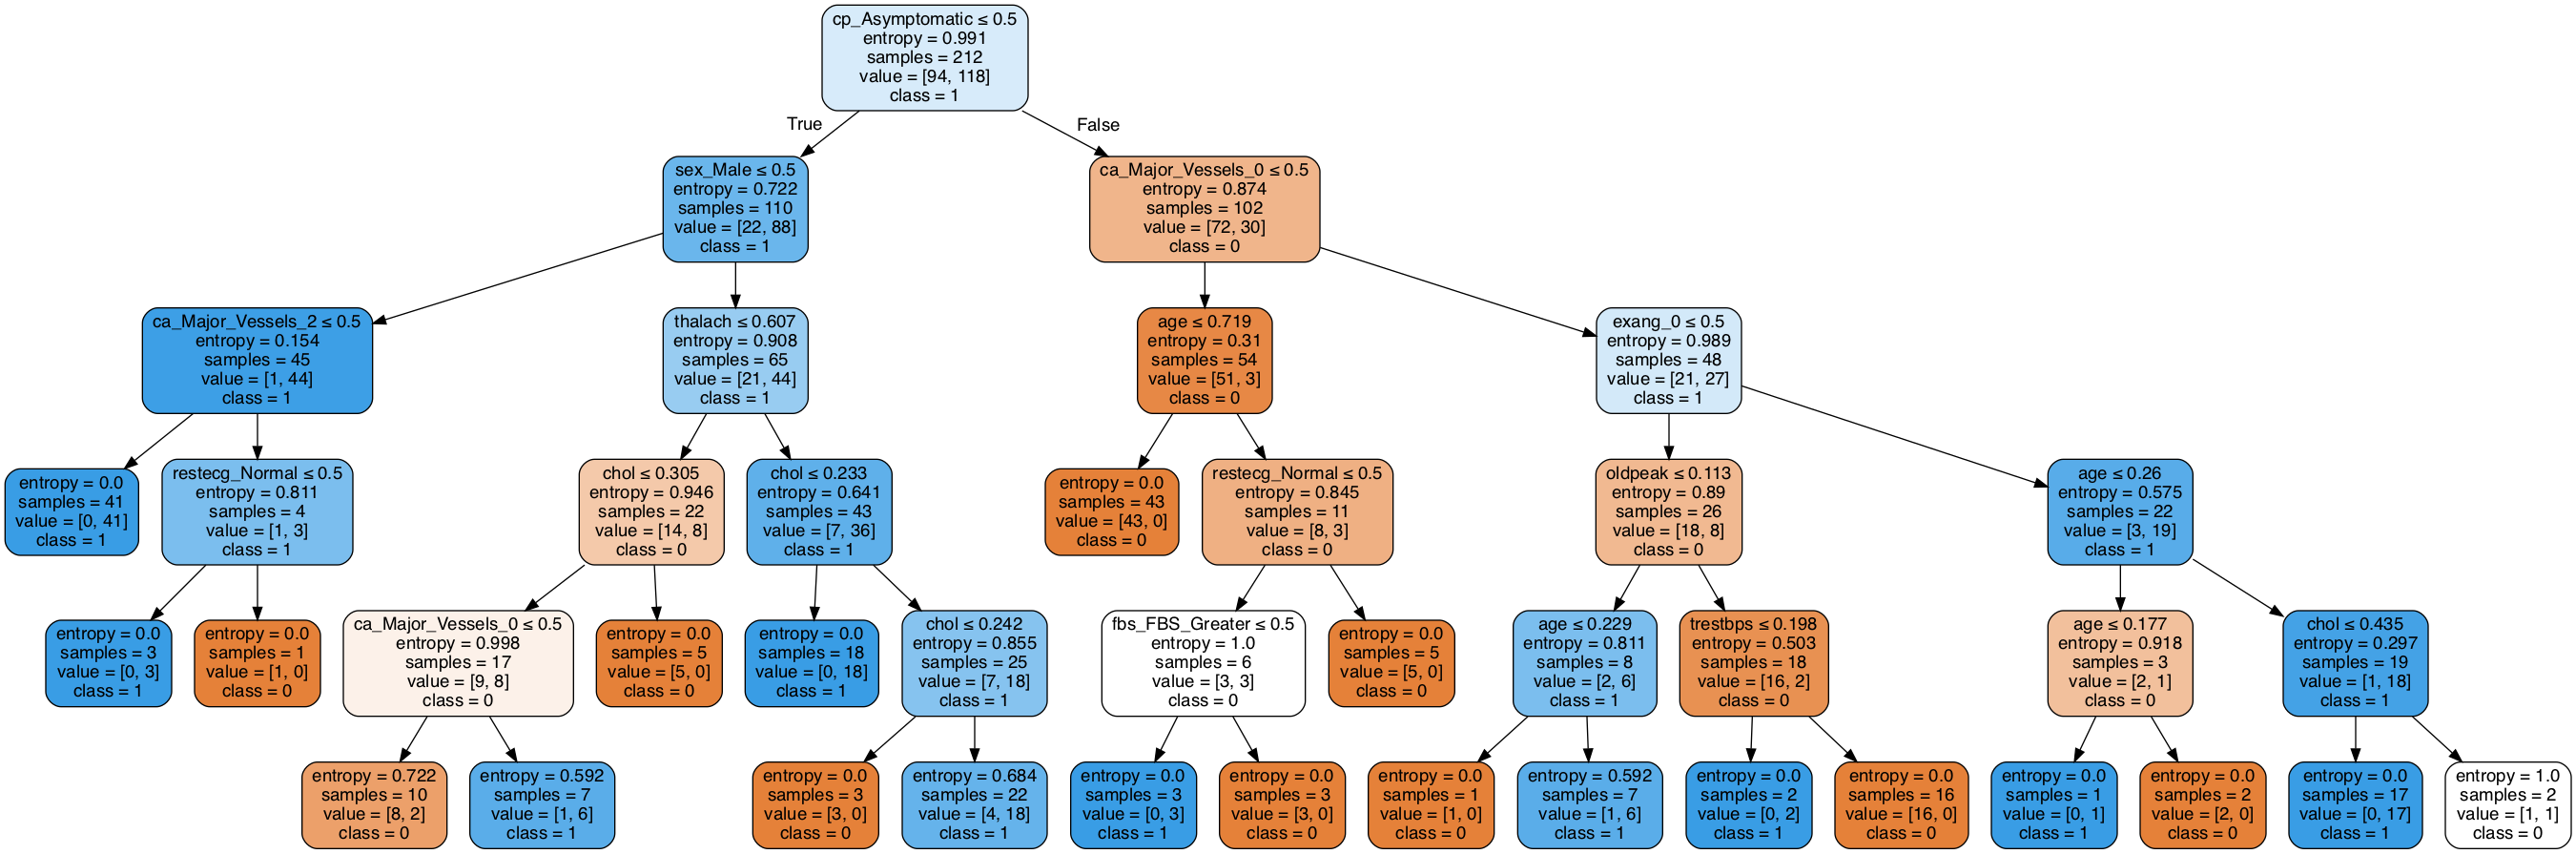

In [128]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,feature_names=X.columns,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart_disease.png')
Image(graph.create_png())

In [129]:
matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[28 16]
 [ 6 41]]


# Logistic Regression

In [130]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

In [131]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8131868131868132


In [132]:
matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[33 11]
 [ 6 41]]


In [133]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.8723404255319149


In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80        44
         1.0       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



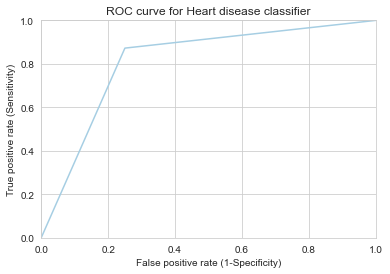

In [135]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [136]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.8111702127659575

In [137]:
print(log.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(log.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[-0.04105604]


,Coeffecient
ca_Major_Vessels_0,1.327640
sex_Female,0.851410
thalach,0.741789
slope_Up_Sloping,0.589671
ca_Major_Vessels_4,0.520180
exang_0,0.519167
cp_Non-Anginal_Pain,0.508764
cp_Typical_angina,0.462476
age,0.187376
restecg_ST-T_Wave_Abnormality,0.165080


<Figure size 720x864 with 0 Axes>

# KNN

In [138]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)
y_pred = knn_classifier.predict(X_test)

In [139]:
matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[31 13]
 [ 2 45]]


In [140]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8351648351648352


In [141]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9574468085106383


# Support Vector Machine

In [146]:
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
Y_pred= sv.predict(X_test)

In [147]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8351648351648352


In [148]:
matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[31 13]
 [ 2 45]]


In [149]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9574468085106383
